In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import statsmodels.api as sm
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import NearestNeighbors

from scipy.stats import ttest_ind

# 1. Load data

In [ ]:
# Load the CSV file
file_path = 'delirium cohort demographics.csv'
data = pd.read_csv(file_path)
data.head()

,Master Record ID,Event Name,Sequential Organ Failure Assessment (SOFA) Score,Age at Admission,Sex at Birth,Race,Hispanic ethnicity,Length of Hospitalization,ICU Length of Stay,SOFA,...,Hydrocort given,Dementia,Deceased,Cause of death,Was patient on ECMO at any point since the last study visit?,"Non-invasive ventilation (e.g. BiPAP, CPAP)","Nasal cannula, face mask, or HFNC oxygen therapy",Maximum O2 flow via NC or face mask,Invasive ventilation,Delirium at any time during hospitalization
0,1001,Enrollment (Arm 1: Inpatient Visits),NaN,34.8,Female,White,0,14,12,10.0,...,NaN,No,No,NaN,No,No,No,NaN,Yes,1
1,1003,Enrollment (Arm 1: Inpatient Visits),NaN,43.6,Female,Other / Multiple Races,0,26,3,4.0,...,NaN,No,No,NaN,No,No,Yes,11-15L,No,0
2,1005,Enrollment (Arm 1: Inpatient Visits),NaN,83.4,Male,Native Hawaiian / Other Pacific Islander,0,16,0,0.0,...,NaN,Yes,No,NaN,No,No,No,NaN,No,1
3,1009,Enrollment (Arm 1: Inpatient Visits),NaN,67.0,Male,White,0,6,4,9.0,...,NaN,No,No,NaN,No,No,No,NaN,Yes,0
4,1010,Enrollment (Arm 1: Inpatient Visits),NaN,50.7,Female,Black / African American,0,5,4,10.0,...,NaN,No,No,NaN,No,No,Yes,11-15L,Yes,0


# 2. Distributions: Age, Sex, Race, Length of Hospitalization and ICU Stay

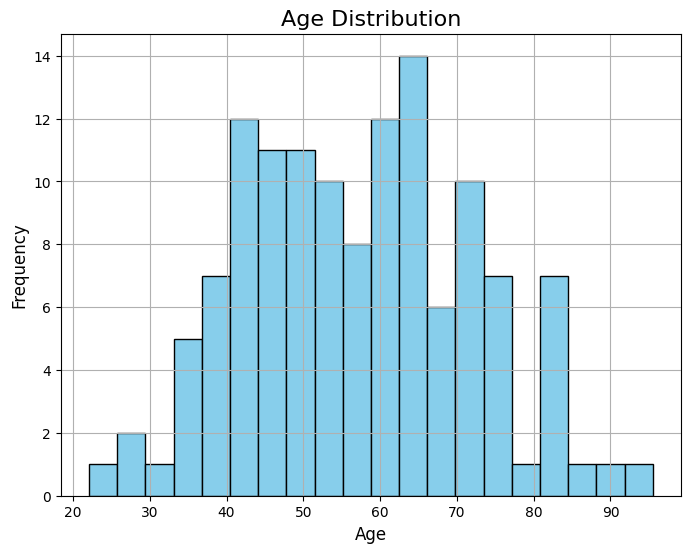

In [ ]:
# Plot Age Histogram
plt.figure(figsize=(8, 6))
plt.hist(data['Age at Admission'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

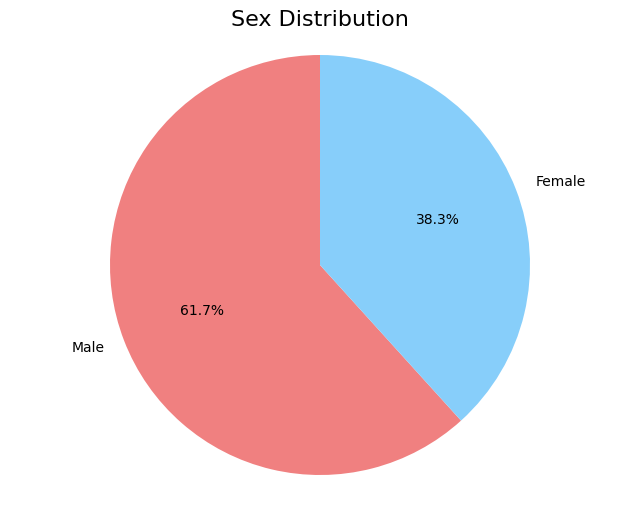

In [ ]:
# Plot Sex Distribution Pie Chart
plt.figure(figsize=(8, 6))
sex_counts = data['Sex at Birth'].value_counts()
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.title('Sex Distribution', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

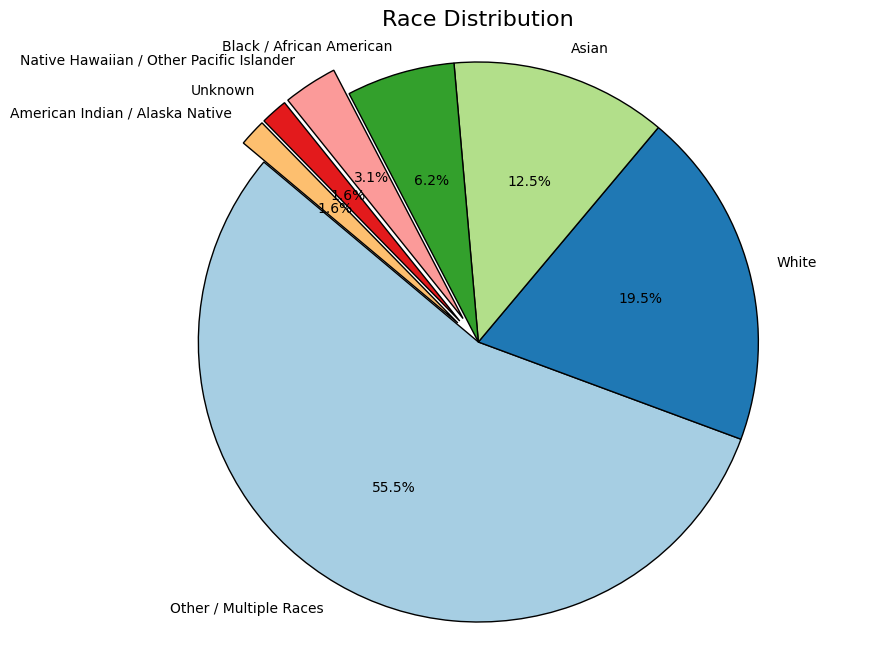

In [ ]:
# Get race counts
race_counts = data['Race'].value_counts()

# Identify the smaller sections to explode
explode = [0.1 if pct < 5 else 0 for pct in (race_counts / race_counts.sum()) * 100]

# Plot Race Distribution Pie Chart
plt.figure(figsize=(10, 8))
plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', startangle=140,
        colors=plt.cm.Paired.colors, explode=explode, wedgeprops={'edgecolor': 'black'})

plt.title('Race Distribution', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

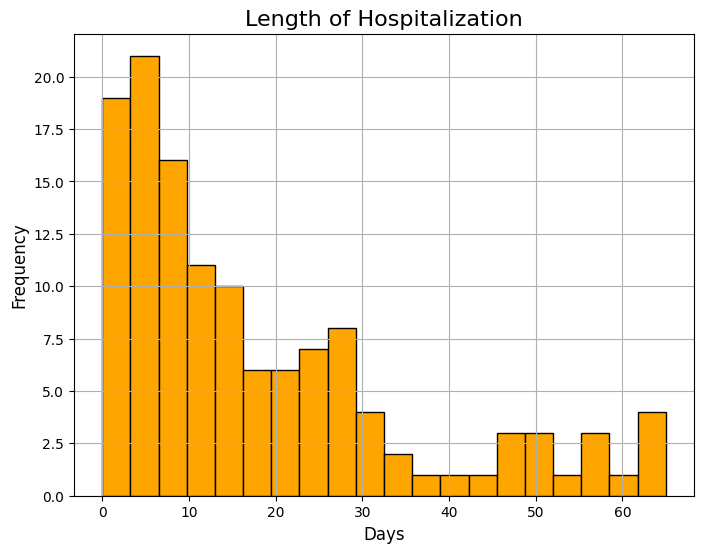

In [ ]:

# Plot Age Histogram
plt.figure(figsize=(8, 6))
plt.hist(data['Length of Hospitalization'], bins=20, color='orange', edgecolor='black')
plt.title('Length of Hospitalization', fontsize=16)
plt.xlabel('Days', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()


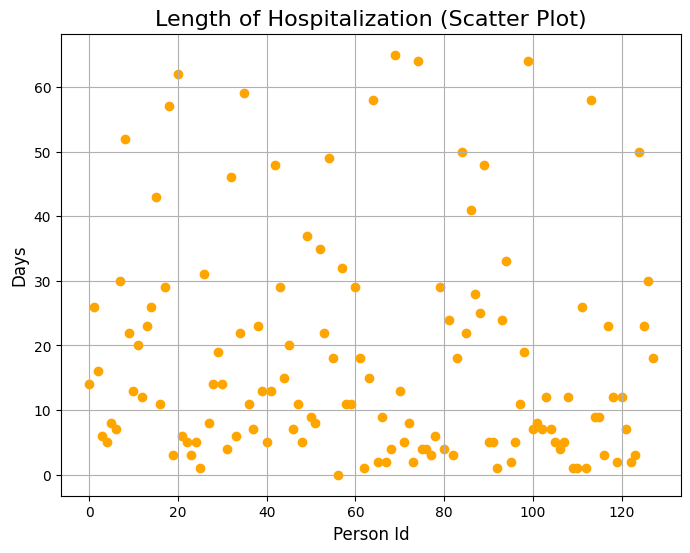

In [ ]:
# Scatter Plot (Individual data points)
plt.figure(figsize=(8, 6))
plt.scatter(data.index, data['Length of Hospitalization'], color='orange')
plt.title('Length of Hospitalization (Scatter Plot)', fontsize=16)
plt.xlabel('Person Id', fontsize=12)
plt.ylabel('Days', fontsize=12)
plt.grid(True)
plt.show()

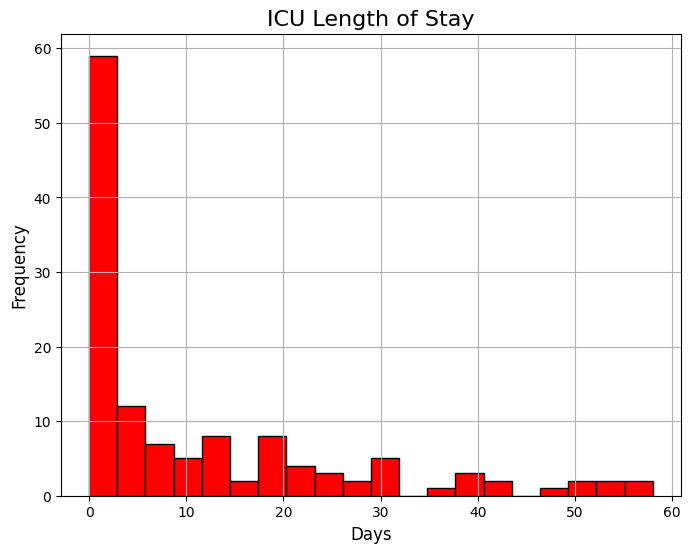

In [ ]:
# Plot Age Histogram
plt.figure(figsize=(8, 6))
plt.hist(data['ICU Length of Stay'], bins=20, color='red', edgecolor='black')
plt.title('ICU Length of Stay', fontsize=16)
plt.xlabel('Days', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

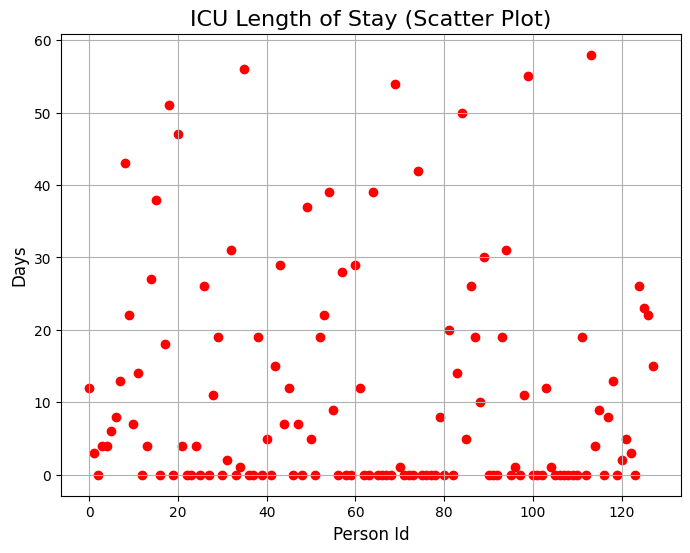

In [ ]:
# Scatter Plot (Individual data points)
plt.figure(figsize=(8, 6))
plt.scatter(data.index, data['ICU Length of Stay'], color='red')
plt.title('ICU Length of Stay (Scatter Plot)', fontsize=16)
plt.xlabel('Person Id', fontsize=12)
plt.ylabel('Days', fontsize=12)
plt.grid(True)
plt.show()

# 3. Data cleanup and split data into train/test datasset

In [ ]:
# Exclude header row and select first 129 rows
data_subset = data.iloc[1:130]

# Define the target variable (Delirium 1/0) and feature columns
# Assuming 'Delirium at any time during hospitalization' is the target
X = data_subset.drop(columns=['Delirium at any time during hospitalization'])
y = data_subset['Delirium at any time during hospitalization']

# Drop columns with missing values (NaN)
X = X.dropna(axis=1)
X.head()

,Master Record ID,Event Name,Age at Admission,Sex at Birth,Race,Hispanic ethnicity,Length of Hospitalization,ICU Length of Stay,Remdesivir,Convalescent plasma,Dementia,Deceased
1,1003,Enrollment (Arm 1: Inpatient Visits),43.6,Female,Other / Multiple Races,0,26,3,No,No,No,No
2,1005,Enrollment (Arm 1: Inpatient Visits),83.4,Male,Native Hawaiian / Other Pacific Islander,0,16,0,No,No,Yes,No
3,1009,Enrollment (Arm 1: Inpatient Visits),67.0,Male,White,0,6,4,No,No,No,No
4,1010,Enrollment (Arm 1: Inpatient Visits),50.7,Female,Black / African American,0,5,4,No,No,No,No
5,1016,Enrollment (Arm 1: Inpatient Visits),63.5,Female,Asian,0,8,6,No,No,No,No


In [ ]:
# Drop columns with missing values (NaN)
X = X.dropna(axis=1)

# Convert categorical features to dummy variables (one-hot encoding)
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.12, random_state=42)


# 4. Baseline Decision Tree Model

In [ ]:

# Create and train the decision tree classifier
dtclf = DecisionTreeClassifier(random_state=42)
dtclf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = dtclf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Baseline Decision Tree model Accuracy: {accuracy}')

Baseline Decision Tree model Accuracy: 0.875


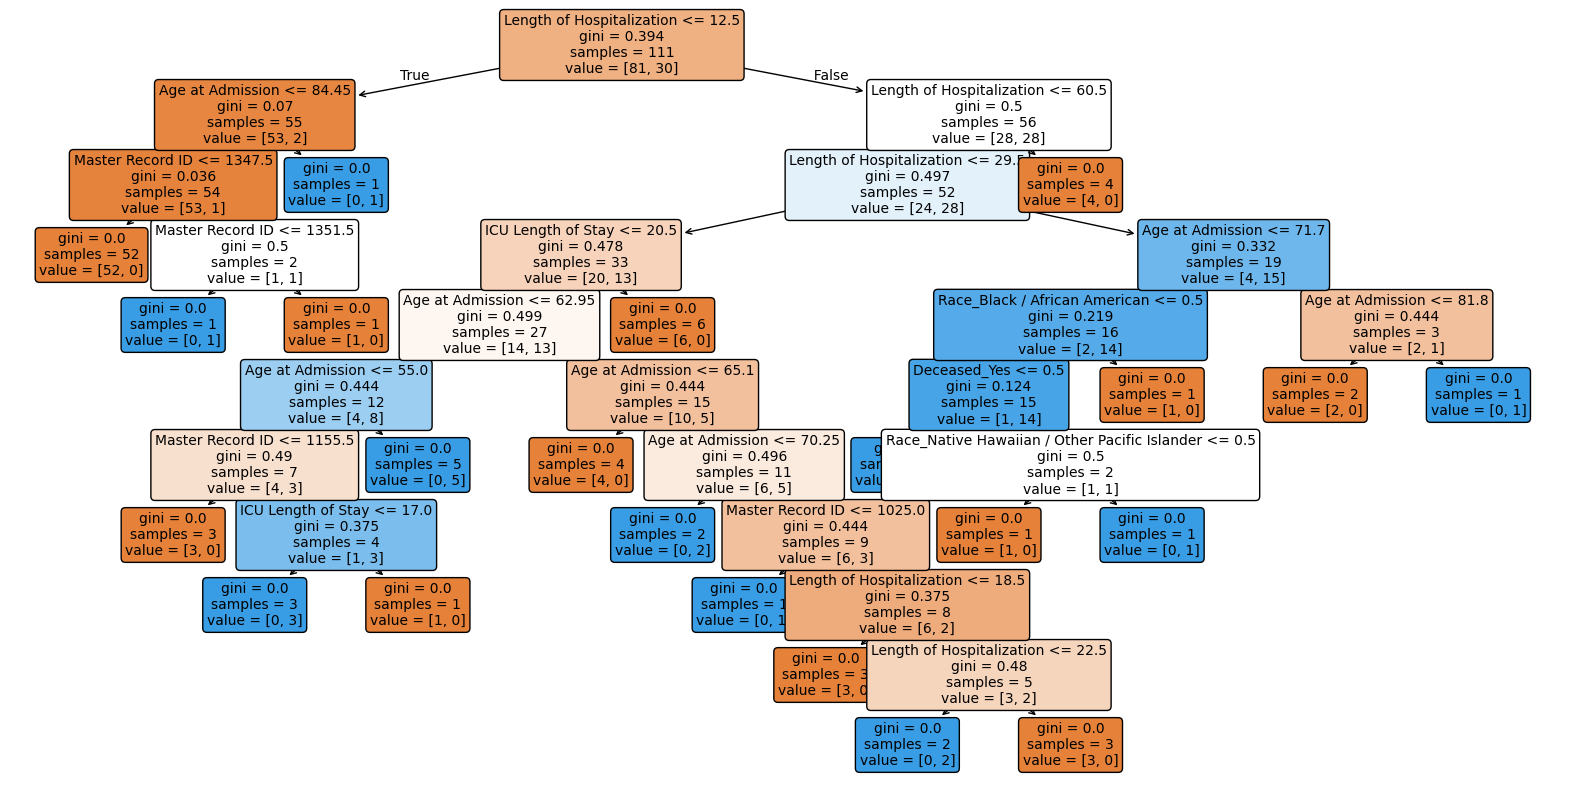

In [ ]:
# Plot the decision tree
plt.figure(figsize=(20, 10))  # Adjust figure size as needed
tree.plot_tree(dtclf, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.show()

# 5. Random Forest Model

In [ ]:
# Create and train the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=128, random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_clf.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf}')

Random Forest Accuracy: 0.875


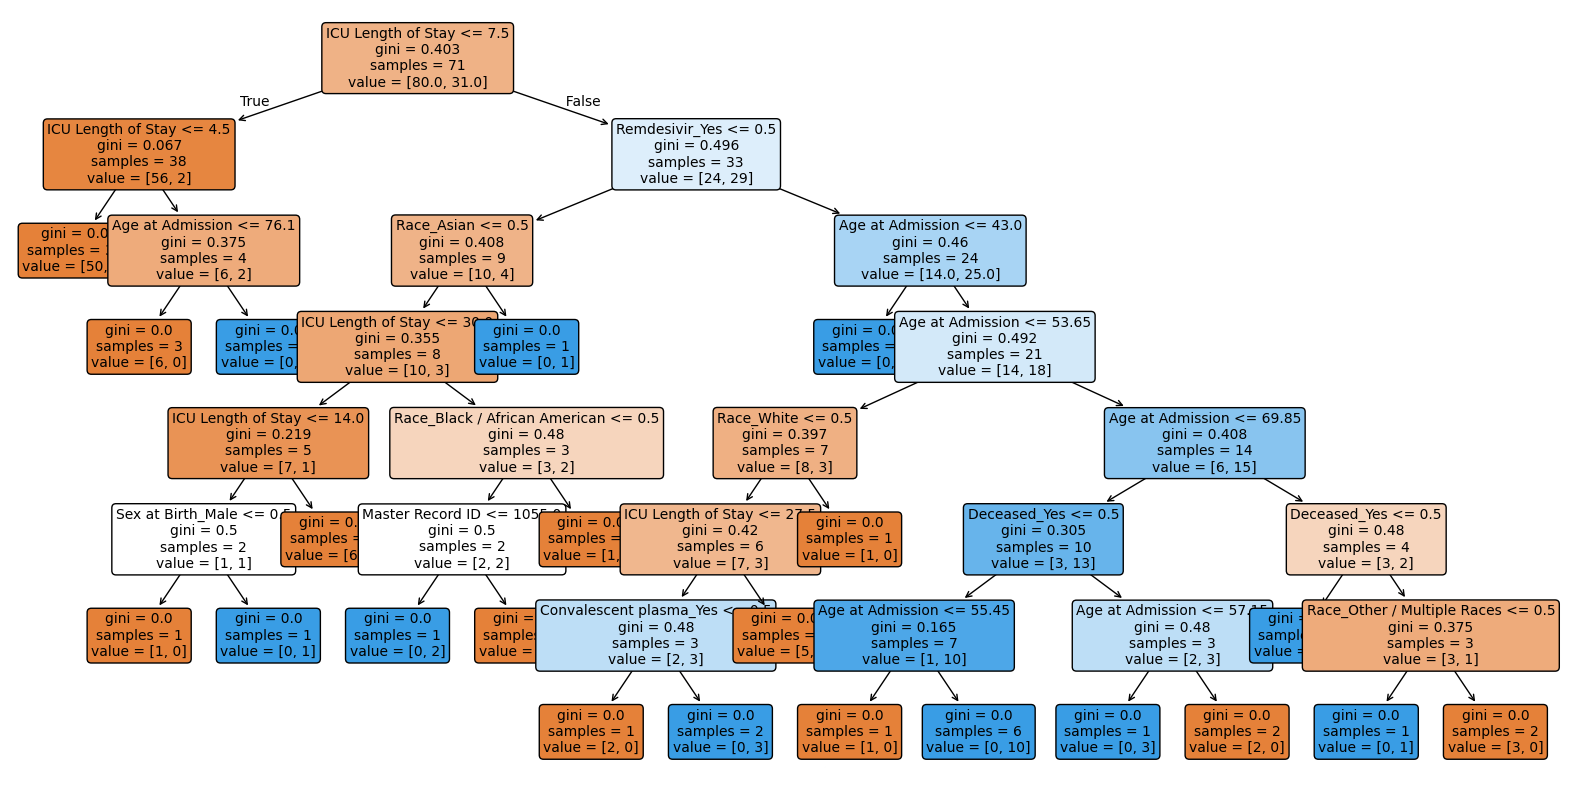

In [ ]:
# Extract one of the trees from the Random Forest
tree_estimator = rf_clf.estimators_[0]  # Choose the first tree

# Plot the decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(tree_estimator, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.show()

# 6. Logistic Regression Model

In [ ]:
# Create and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=4000, random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = log_reg.predict(X_test)

# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Logistic Regression Accuracy: {accuracy_lr}')
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Logistic Regression Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16


Confusion Matrix:
 [[16]]


/Users/dsu/p310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [ ]:
# Create a DataFrame to display coefficients with feature names
coef_df = pd.DataFrame(log_reg.coef_, columns=X.columns)
print("Coefficients:\n", coef_df)
print("Intercept:", log_reg.intercept_)

# Display model parameters
print("\nModel Parameters:")
print(log_reg.get_params())

Coefficients:
    Master Record ID  Age at Admission  Length of Hospitalization  \
0         -0.000911          0.011099                   0.081894   

   ICU Length of Stay  Sex at Birth_Male  Race_Asian  \
0           -0.035503           0.124759    0.807439   

   Race_Black / African American  \
0                       0.183116   

   Race_Native Hawaiian / Other Pacific Islander  Race_Other / Multiple Races  \
0                                       0.387609                    -0.344641   

   Race_Unknown  Race_White  Hispanic ethnicity_1  Hispanic ethnicity_unknown  \
0     -0.053406    -0.21772             -0.646491                   -0.053406   

   Remdesivir_Yes  Convalescent plasma_Yes  Dementia_Unknown  Dementia_Yes  \
0         1.10874                 1.018612          0.181458      0.653861   

   Deceased_Yes  
0     -0.358079  
Intercept: [-2.65931602]

Model Parameters:
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_

# 7. Statistic Significant tests

## 7.1 Significant Test for Remdesivir and Convalescent plasma treatments

In [ ]:
treatments = data[['Remdesivir','Convalescent plasma','Delirium at any time during hospitalization']]
treatments.head()

,Remdesivir,Convalescent plasma,Delirium at any time during hospitalization
0,Yes,No,1
1,No,No,0
2,No,No,1
3,No,No,0
4,No,No,0


In [ ]:
def compute_ate_permutation_test(df, treatment_col, outcome_col, n_permutations=1000, significance_level=0.05):
    """
    Compute the Average Treatment Effect (ATE) and perform a permutation test.

    Parameters:
        df (pd.DataFrame): The dataframe containing the data.
        treatment_col (str): The name of the treatment column (values should be 'Yes' or 'No').
        outcome_col (str): The name of the outcome column (values should be 1 or 0).
        n_permutations (int): Number of permutations for the test.
        significance_level (float): Significance level for the test.

    Returns:
        tuple: Observed ATE, p-value from permutation test, and significance result.
    """
    # Calculate observed ATE
    treated_mean = df[df[treatment_col] == 'Yes'][outcome_col].mean()
    control_mean = df[df[treatment_col] == 'No'][outcome_col].mean()
    observed_ate = treated_mean - control_mean

    # Perform permutation test
    np.random.seed(42)  # For reproducibility
    permuted_ates = []
    for _ in range(n_permutations):
        permuted_treatment = np.random.permutation(df[treatment_col])
        treated_mean_perm = df[permuted_treatment == 'Yes'][outcome_col].mean()
        control_mean_perm = df[permuted_treatment == 'No'][outcome_col].mean()
        permuted_ates.append(treated_mean_perm - control_mean_perm)

    # Calculate p-value
    p_value = np.mean(np.abs(permuted_ates) >= np.abs(observed_ate))

    # Determine significance
    significance = p_value < significance_level

    return observed_ate, p_value, significance

In [ ]:
# Invoke function for both 'Remdesivir' and 'Convalescent plasma' columns
outcome_col = 'Delirium at any time during hospitalization'
remdesivir_result = compute_ate_permutation_test(treatments, 'Remdesivir', outcome_col)
convalescent_result = compute_ate_permutation_test(treatments, 'Convalescent plasma', outcome_col)

In [ ]:
print(f'Remdesivir result: ATE={remdesivir_result[0]}, p-value={remdesivir_result[1]}, Significant?: {remdesivir_result[2]}')
print(f'Convalescent plasma result: ATE={convalescent_result[0]}, p-value={convalescent_result[1]}, Significant?: {convalescent_result[2]}')

Remdesivir result: ATE=0.17444326617179215, p-value=0.026, Significant?: True
Convalescent plasma result: ATE=0.32923976608187133, p-value=0.0, Significant?: True


## 7.2 Significant Tests for

In [ ]:
TestFeatures = data[['Age at Admission','Length of Hospitalization', 'Delirium at any time during hospitalization']]
TestFeatures.head()

,Age at Admission,Length of Hospitalization,Delirium at any time during hospitalization
0,34.8,14,1
1,43.6,26,0
2,83.4,16,1
3,67.0,6,0
4,50.7,5,0


We use logistic regression model summary to evalue statistic significance
- **Coefficients and p-values**: For each predictor, the model output will show whether Age at Admission and Length of Hospitalization significantly predict Delirium.
- **Statistical Significance**: If either predictor has a p-value below 0.05, it is considered statistically significant for predicting Delirium at any time during hospitalization.

In [ ]:
def logistic_regression_test(df, predictors, outcome):
    """
    Perform logistic regression to test the significance of predictors on a binary outcome.

    Parameters:
        df (pd.DataFrame): The dataframe containing the data.
        predictors (list of str): List of predictor column names.
        outcome (str): The binary outcome column name.

    Returns:
        pd.DataFrame: Summary table of logistic regression results, including p-values.
    """
    X = df[predictors]
    X = sm.add_constant(X)  # Add intercept
    y = df[outcome]

    # Fit logistic regression model
    model = sm.Logit(y, X)
    result = model.fit(disp=0)

    # Return the summary of results
    return result.summary()

In [ ]:
# Perform logistic regression and display results
outcome = 'Delirium at any time during hospitalization'
logistic_regression_test(TestFeatures, ['Age at Admission','Length of Hospitalization'], outcome)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        Logit Regression Results                                       
=======================================================================================================
Dep. Variable:     Delirium at any time during hospitalization   No. Observations:                  128
Model:                                                   Logit   Df Residuals:                      125
Method:                                                    MLE   Df Model:                            2
Date:                                         Wed, 06 Nov 2024   Pseudo R-squ.:                  0.1625
Time:                                                 15:00:27   Log-Likelihood:                -59.344
converged:                                                True   LL-Null:                       -70.859
Covariance Type:                                     nonrobust   LLR p-value:                 9.972e-06
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -3.4795      1.043     -3.335      0.001      -5.525      -1.434
Age at Admission              0.0201      0.016      1.241      0.215      -0.012       0.052
Length of Hospitalization     0.0546      0.013      4.173      0.000       0.029       0.080
=============================================================================================
"""

From the model summary, we see the following results:
- "Age at Admision" featture:  has P value 0.215, so it's not statistically significant for
- "Length of Hospitalization" feature: have P value 0.000, it's statistically significant for Delirium

# 8. Observed Study: Causal Analysis using inverse Propensity Score weighting approach

The dataset we got is an observed patients record, not random control group study. Therefore, we will well-estalished causual analysis for observed study.

We use logistic regression to calculate propensity score on a particular treatment, then using matching method to calculate ATE

In [ ]:
def calculate_propensity_scores(df, treatment, covariates, clip=True):
    """
    Estimate propensity scores for a binary treatment using logistic regression,
    with one-hot encoding for categorical covariates. Optionally clip the propensity scores.

    Parameters:
        df (pd.DataFrame): The dataframe containing the data.
        treatment (str): The name of the treatment column (binary 1/0).
        covariates (list of str): List of covariate column names.
        clip (bool): Whether to clip the propensity scores to avoid extreme values.

    Returns:
        np.array: Estimated propensity scores.
    """
    df_encoded = pd.get_dummies(df[covariates], drop_first=True)
    model = LogisticRegression(solver='liblinear', max_iter=10000)
    model.fit(df_encoded, df[treatment])

    propensity_scores = model.predict_proba(df_encoded)[:, 1]

    '''if clip:
        # Clip the propensity scores between 0.05 and 0.95 to avoid extreme weights
        propensity_scores = np.clip(propensity_scores, 0.05, 0.95)'''

    return propensity_scores

def inverse_propensity_weighting(df, treatment, outcome, covariates):
    """
    Perform inverse propensity weighting to estimate ATE.

    Parameters:
        df (pd.DataFrame): DataFrame with the data.
        treatment (str): Name of the treatment column.
        outcome (str): Name of the outcome column.
        covariates (list of str): List of covariate column names.

    Returns:
        float: Estimated ATE.
    """
    # Estimate propensity scores
    df['propensity_score'] = calculate_propensity_scores(df, treatment, covariates)

    # Compute weights for treated and control groups
    df['weight'] = np.where(df[treatment] == 1,
                            1 / df['propensity_score'],
                            1 / (1 - df['propensity_score']))

    # Remove rows where weight is infinite or NaN
    df = df[np.isfinite(df['weight'])]

    # Check if there are any remaining treated or control individuals
    if df[df[treatment] == 1].shape[0] == 0 or df[df[treatment] == 0].shape[0] == 0:
        raise ValueError("No valid treated or control individuals after weighting.")

    # Calculate weighted means for outcome in treated and control groups
    treated_mean = np.average(df[df[treatment] == 1][outcome], weights=df[df[treatment] == 1]['weight'])
    control_mean = np.average(df[df[treatment] == 0][outcome], weights=df[df[treatment] == 0]['weight'])

    # Calculate ATE
    ate = treated_mean - control_mean

    return ate, treated_mean, control_mean

In [ ]:
# Define covariates and outcome
covariates = ['Race', 'Sex at Birth', 'Hispanic ethnicity', 'Dementia', 'Age at Admission', 'Length of Hospitalization','ICU Length of Stay']
outcome = 'Delirium at any time during hospitalization'

In [ ]:
df = data.copy()
# Convert Yes/No treatment to binary 1/0
df['Remdesivir'] = df['Remdesivir'].map({'Yes': 1, 'No': 0})
df['Convalescent plasma'] = df['Convalescent plasma'].map({'Yes': 1, 'No': 0})

# Perform inverse propensity weighting for 'Remdesivir' treatment
ate_remdesivir, treated_mean_remdesivir, control_mean_remdesivir = inverse_propensity_weighting(
    df, 'Remdesivir', outcome, covariates
)

# Perform inverse propensity weighting for 'Convalescent plasma' treatment
ate_convalescent, treated_mean_convalescent, control_mean_convalescent = inverse_propensity_weighting(
    df, 'Convalescent plasma', outcome, covariates
)

# Results
print("adjusted ATE for Remdesivir on Delirium:", ate_remdesivir)
print("Treated group mean (Remdesivir):", treated_mean_remdesivir)
print("Control group mean (Remdesivir):", control_mean_remdesivir)

print("adjusted ATE for Convalescent plasma on Delirium:", ate_convalescent)
print("Treated group mean (Convalescent plasma):", treated_mean_convalescent)
print("Control group mean (Convalescent plasma):", control_mean_convalescent)

adjusted ATE for Remdesivir on Delirium: 0.11643693938255151
Treated group mean (Remdesivir): 0.28842281358477495
Control group mean (Remdesivir): 0.17198587420222344
adjusted ATE for Convalescent plasma on Delirium: 0.15747597311043443
Treated group mean (Convalescent plasma): 0.4505018325291385
Control group mean (Convalescent plasma): 0.29302585941870407


In [ ]:
# Create a new column to categorize people based on treatment combination
def treatment_combination(row):
    if row['Remdesivir'] == 1 and row['Convalescent plasma'] == 1:
        return 'Both'
    elif row['Remdesivir'] == 1:
        return 'Remdesivir Only'
    elif row['Convalescent plasma'] == 1:
        return 'Convalescent plasma Only'
    else:
        return 'Neither'

df['Treatment Group'] = df.apply(treatment_combination, axis=1)

# Plotting the distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Treatment Group', palette='Set2')
plt.title('Distribution of People Based on Treatment')
plt.xlabel('Treatment Group')
plt.ylabel('Number of People')
plt.show()

# 9.  Does Combined sTreatments result in high Dilirum risk?

/var/folders/0b/ml5pw92d6t12_bpxsv9846fw0000gn/T/ipykernel_2322/1242259294.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Treatment Group', palette='Set2')


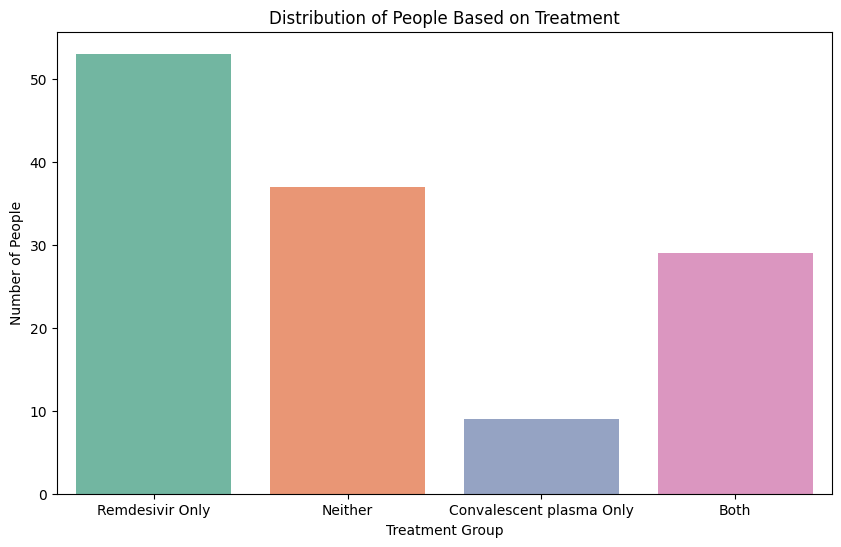

In [ ]:
# Create a new column to categorize people based on treatment combination
def treatment_combination(row):
    if row['Remdesivir'] == 1 and row['Convalescent plasma'] == 1:
        return 'Both'
    elif row['Remdesivir'] == 1:
        return 'Remdesivir Only'
    elif row['Convalescent plasma'] == 1:
        return 'Convalescent plasma Only'
    else:
        return 'Neither'

df['Treatment Group'] = df.apply(treatment_combination, axis=1)

# Plotting the distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Treatment Group', palette='Set2')
plt.title('Distribution of People Based on Treatment')
plt.xlabel('Treatment Group')
plt.ylabel('Number of People')
plt.show()

In [ ]:
# Calculate the risk (mean Delirium outcome) for each treatment group
risk_by_group = df.groupby('Treatment Group')['Delirium at any time during hospitalization'].mean()

# Print the risk for each group
print(risk_by_group)

# Perform pairwise t-tests to compare the risk of Delirium between groups
# Compare 'Both' vs 'Remdesivir Only'
both_group = df[df['Treatment Group'] == 'Both']
remdesivir_group = df[df['Treatment Group'] == 'Remdesivir Only']
t_stat, p_val = ttest_ind(both_group['Delirium at any time during hospitalization'], remdesivir_group['Delirium at any time during hospitalization'])

print(f"\n\nBoth vs Remdesivir Only: t-statistic = {t_stat}, p-value = {p_val}")

# Compare 'Both' vs 'Convalescent Plasma Only'
convalescent_group = df[df['Treatment Group'] == 'Convalescent plasma Only']
t_stat, p_val = ttest_ind(both_group['Delirium at any time during hospitalization'], convalescent_group['Delirium at any time during hospitalization'])

print(f"Both vs Convalescent Plasma Only: t-statistic = {t_stat}, p-value = {p_val}")

# Compare 'Both' vs 'Neither'
neither_group = df[df['Treatment Group'] == 'Neither']
t_stat, p_val = ttest_ind(both_group['Delirium at any time during hospitalization'], neither_group['Delirium at any time during hospitalization'])

print(f"Both vs Neither: t-statistic = {t_stat}, p-value = {p_val}")

Treatment Group
Both                        0.517241
Convalescent plasma Only    0.333333
Neither                     0.081081
Remdesivir Only             0.188679
Name: Delirium at any time during hospitalization, dtype: float64
Both vs Remdesivir Only: t-statistic = 3.2469338734162974, p-value = 0.001705326286881006
Both vs Convalescent Plasma Only: t-statistic = 0.9512880423473018, p-value = 0.3478016566561629
Both vs Neither: t-statistic = 4.449431139130821, p-value = 3.512719846328754e-05
